<font style = 'color:green; font-size:30px; font-weight: bold'>Introduction to Machile Learning - Classification III</font>

<font color= 'gray' style='font-size: 30px'>1.2 Reading data</font>
<hr style = 'border: 2px solid gray'>

In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
exchange = { 
    0: 1,
    1: 0
}
data['finished'] = data['unfinished'].map(exchange)

data.drop(columns = 'unfinished', inplace = True)


# 0 -> project unfinished
# 1 -> project finished

In [3]:
data.head()

,expected_hours,price,finished
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0


<font color= 'gray' style='font-size: 30px'>1.3 Analysing variables</font>
<hr style = 'border: 2px solid gray'>

Text(0, 0.5, 'Price')

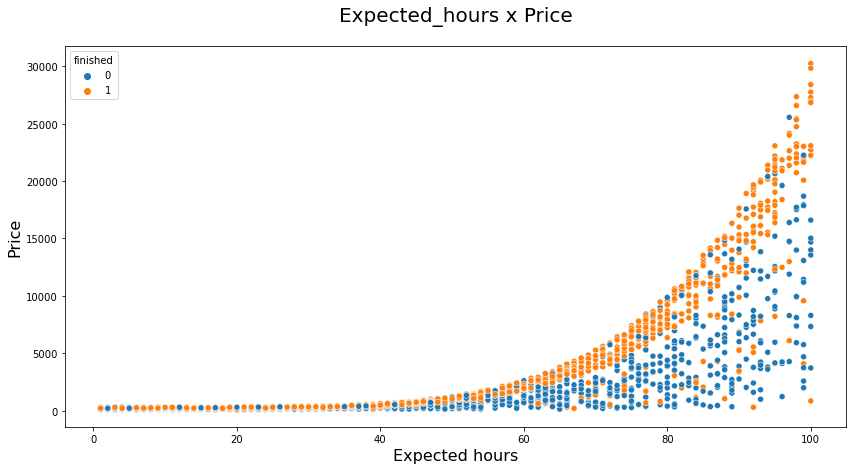

In [4]:
import seaborn as sns

ax = sns.scatterplot(x = 'expected_hours', y = 'price', data = data, hue = 'finished') 
ax.figure.set_size_inches(14, 7)
ax.set_title('Expected_hours x Price', fontsize = 20, y = 1.05)

ax.set_xlabel('Expected hours', fontsize = 16)
ax.set_ylabel('Price', fontsize = 16)

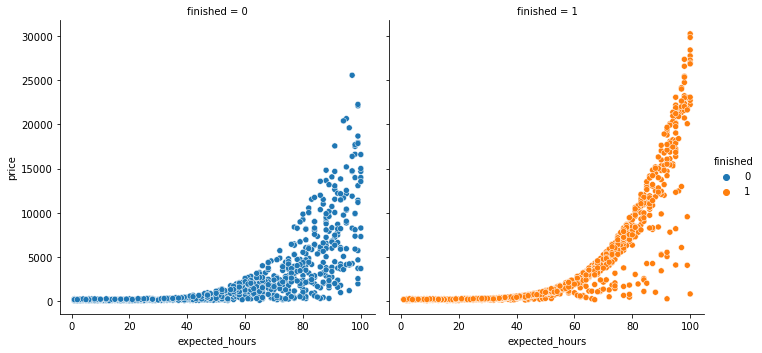

In [5]:
ax = sns.relplot(x = 'expected_hours', y = 'price', data = data, hue = 'finished', col = 'finished') 

<font color= 'gray' style='font-size: 30px'>1.4 Building model</font>
<hr style = 'border: 2px solid gray'>

### Separated features(x) and the classification (y)

In [6]:
X = data[['expected_hours', 'price']]
y = data['finished']

### importing 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score 
import numpy as np

### Train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    train_size=0.75, 
    random_state=20, 
    stratify=y #-> irá estratificar os dados proporcionalmente de acordo com y
)

### Model

In [9]:
model = LinearSVC(random_state = 1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/home/gabriel-liamdev/anaconda3/envs/learn_pandas/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Accuracy

In [10]:
accuracy = accuracy_score(y_test,  predictions) 
print(f'Accuracy = {accuracy * 100:.2f} %')

Accuracy = 53.33 %


### Baseline accuracy predictions

In [11]:
baseline_predictions= np.ones(540)
accuracy = accuracy_score(y_test,  baseline_predictions) 
print(f'Accuracy = {accuracy * 100:.2f} %')

Accuracy = 52.59 %


> There is almost no difference between model accuracy and baseline accuracy 

## Analysing test

Text(0, 0.5, 'Price')

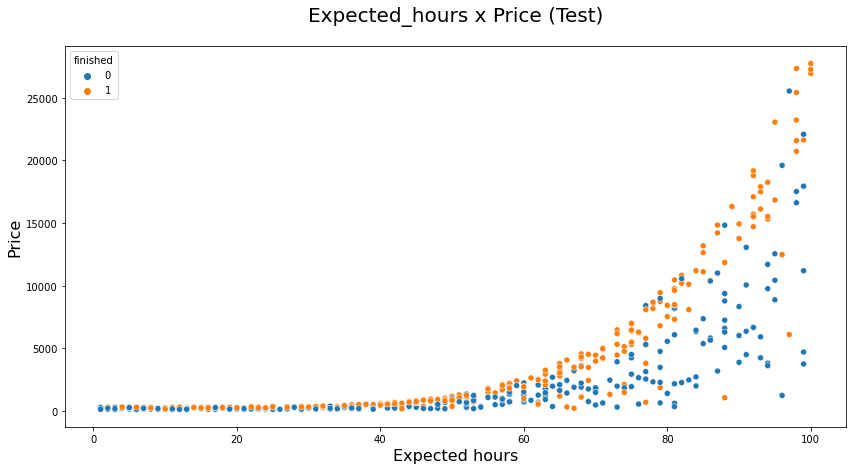

In [12]:
ax = sns.scatterplot(x = 'expected_hours', y = 'price', data = X_test, hue = y_test) 
ax.figure.set_size_inches(14, 7)
ax.set_title('Expected_hours x Price (Test)', fontsize = 20, y = 1.05)

ax.set_xlabel('Expected hours', fontsize = 16)
ax.set_ylabel('Price', fontsize = 16)

<font color= 'gray' style='font-size: 30px'>1.5 Building new model</font>
<hr style = 'border: 2px solid gray'>

In [13]:
x_min = X_test['expected_hours'].min()
x_max = X_test['expected_hours'].max()
y_min = X_test['price'].min()
y_max = X_test['price'].max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [14]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / 100)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / 100)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [15]:
Z = model.predict(points)
Z = Z.reshape(100, 100)

/home/gabriel-liamdev/anaconda3/envs/learn_pandas/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


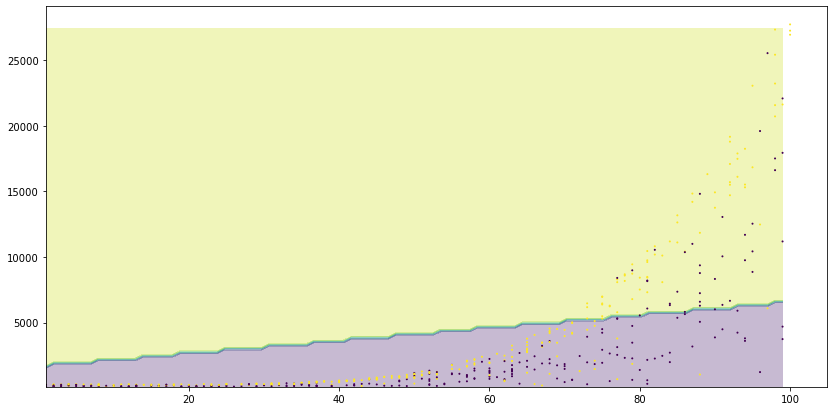

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (14, 7))

ax.contourf(xx, yy, Z, alpha = 0.3)
ax = plt.scatter(
    X_test['expected_hours'], 
    X_test['price'], 
    c = y_test,
    s = 1
)